<a href="https://colab.research.google.com/github/KishorAlagappan/Task_6/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [80]:
df = pd.read_csv("/content/car_data.csv")

In [81]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [82]:
df = df.drop_duplicates()

In [83]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [84]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

Task-1

In [85]:
x = df[['Mileage']].values
y = df[['Price']].values

In [86]:
print(x)

[[ 8221]
 [ 9135]
 [13196]
 [16342]
 [19832]
 [22236]
 [22576]
 [22964]
 [24021]
 [27325]
 [10237]
 [15066]
 [16633]
 [19800]
 [23359]
 [23765]
 [24008]
 [26034]
 [32896]
 [34665]
 [ 8970]
 [10577]
 [14363]
 [16508]
 [18908]
 [19467]
 [21394]
 [22596]
 [24469]
 [25245]
 [15755]
 [16235]
 [18147]
 [22102]
 [23612]
 [24439]
 [25212]
 [26779]
 [27096]
 [29649]
 [ 2992]
 [10036]
 [18339]
 [19592]
 [21797]
 [23852]
 [25040]
 [25052]
 [25464]
 [27830]
 [17353]
 [17787]
 [19562]
 [20137]
 [20158]
 [23767]
 [24323]
 [27839]
 [29187]
 [31324]
 [ 2308]
 [10014]
 [18910]
 [20105]
 [20453]
 [22287]
 [23237]
 [23798]
 [25489]
 [25564]
 [ 4695]
 [ 9795]
 [12052]
 [13050]
 [17335]
 [17480]
 [24027]
 [25387]
 [25869]
 [37128]
 [ 2202]
 [ 6685]
 [15343]
 [21341]
 [21367]
 [23371]
 [23751]
 [24052]
 [25199]
 [30082]
 [ 6598]
 [10625]
 [11013]
 [14937]
 [17094]
 [17870]
 [18449]
 [21039]
 [21056]
 [27484]
 [14095]
 [14743]
 [16041]
 [17138]
 [18661]
 [21966]
 [24415]
 [25163]
 [25339]
 [25421]
 [ 5499]
 

In [87]:
print(y)

[[17314.1031289 ]
 [17542.03608328]
 [16218.84786194]
 [16336.91314005]
 [16339.17032393]
 [15709.05282108]
 [15230.00338985]
 [15048.04218412]
 [14862.0938696 ]
 [15295.01826688]
 [21335.85248489]
 [20538.08751023]
 [20512.09409124]
 [19924.1590524 ]
 [19774.24906607]
 [19344.16553736]
 [19105.13012442]
 [18543.42704537]
 [17808.19899602]
 [17968.83827826]
 [22358.87767812]
 [23785.92252638]
 [22926.09037126]
 [21895.7587842 ]
 [21273.06171392]
 [21460.01395289]
 [21183.12358742]
 [20406.09950289]
 [21058.13957995]
 [19556.89932029]
 [23447.68656101]
 [23547.23944288]
 [23016.00800868]
 [22230.02750256]
 [22625.07356605]
 [21799.17209689]
 [21341.25720707]
 [21683.03146355]
 [20986.01601748]
 [20902.10379431]
 [20698.07708317]
 [20099.25684484]
 [18145.12648909]
 [17944.85692346]
 [19027.86230543]
 [18348.89857169]
 [17750.88457463]
 [17772.96968004]
 [17394.0213978 ]
 [17645.74504414]
 [21908.36662462]
 [21956.34266271]
 [21646.11692355]
 [21575.456827  ]
 [20952.2178016 ]
 [21562.04

In [88]:
reg = linear_model.LinearRegression()
reg.fit(x, y)

print('intercept:', reg.intercept_)
print('coefficients:', reg.coef_)
print('r2- Score:', reg.score(x, y))

intercept: [24764.55900606]
coefficients: [[-0.1725205]]
r2- Score: 0.02046344732348926


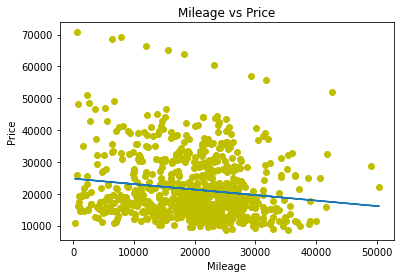

In [89]:
plt.scatter(x, y, color='y')
plt.plot(x, reg.predict(x))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')
plt.show()

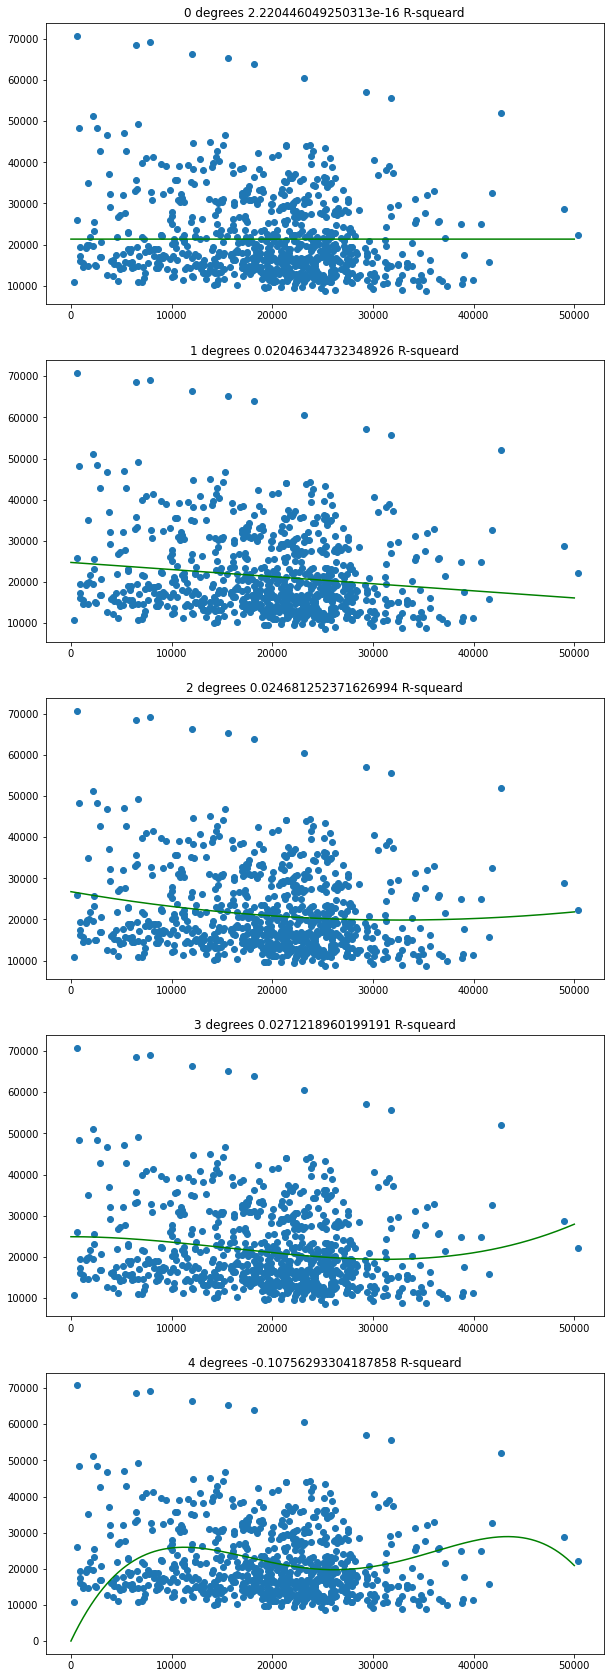

In [90]:
degrees = 5
fig, axs = plt.subplots(degrees, figsize = (10, 30))

for degree in range(degrees):
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', linear_model.LinearRegression(fit_intercept=False))])

    points = 50000


    model = model.fit(x, y)
    model_score = model.score(x,y)

    subplot = axs[degree]
    subplot.plot(model.predict([[j] for j in range(points)]), color='g')
    subplot.scatter(x, y)
    subplot.set_title('{} degrees {} R-squeard'.format(degree, model_score))

plt.show()

Task-2

In [91]:
attributes = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
x = df[attributes]
y = df[['Price']]

In [92]:
reg = linear_model.LinearRegression()
reg.fit(x, y)

print('intercept:', reg.intercept_)
print('coefficients:', reg.coef_)

intercept: [6758.7551436]
coefficients: [[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
   6.28899715e+03 -1.99379528e+03  3.34936162e+03]]


In [93]:
print('R2- score: ', reg.score(x, y))

R2- score:  0.4462643536728379


Task-3

In [94]:
dummy = pd.get_dummies(df)
print(dummy)

            Price  Mileage  Cylinder  Liter  Doors  Cruise  Sound  Leather  \
0    17314.103129     8221         6    3.1      4       1      1        1   
1    17542.036083     9135         6    3.1      4       1      1        0   
2    16218.847862    13196         6    3.1      4       1      1        0   
3    16336.913140    16342         6    3.1      4       1      0        0   
4    16339.170324    19832         6    3.1      4       1      0        1   
..            ...      ...       ...    ...    ...     ...    ...      ...   
799  16507.070267    16229         6    3.0      4       1      0        0   
800  16175.957604    19095         6    3.0      4       1      1        0   
801  15731.132897    20484         6    3.0      4       1      1        0   
802  15118.893228    25979         6    3.0      4       1      1        0   
803  13585.636802    35662         6    3.0      4       1      0        0   

     Make_Buick  Make_Cadillac  ...  Trim_SVM Hatchback 4D  Tri